___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Arthur Alegro de Oliveira

#### Rafael dos Santos

#### José Antônio Bechara

___

# Classificação de Apps

___

## A. INTRODUÇÃO

Objetivo: Prever a nota de um app da PlayStore ou da AppStore

[Aqui mais espaço!]

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import json
import os

### BASE DE DADOS

Carregando *database*:

In [2]:
# Reading Google Play Store data:
Google_data = pd.read_csv('googleplaystore.csv')

In [3]:
Google_data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


Ao analisar o *database* notamos que algumas colunas possuem dados numéricos em sua essência, mas por possuir outros caracteres são interpretados como texto. A seguir, serão destrinchados os problemas em cada umas dessas colunas. As funções que serão usadas já estão definidas abaixo:

In [4]:
def remove_last_char(word):
    new_word = word[:-1]
    return new_word

def remove_comma(word):
    new_word = "".join(word.split(','))
    return new_word

def remove_first_char(word):
    if '$' in word:
        new_word = word[1:]
        return new_word
    else:
        return word

Coluna `Size`:  
* possui o último caractere não numérico

In [5]:
Google_data['Size'] = Google_data['Size'].apply(remove_last_char)

 Coluna `Installs`:  
 * possui o último caractere não numérico
 * possui vírgulas como separador a cada $10^3$
 * possui dois tipos valores não itendificados (`Fre` e ` ` ) que serão descartados

In [6]:
Google_data['Installs'] = Google_data['Installs'].apply(remove_last_char)
Google_data['Installs'] = Google_data['Installs'].apply(remove_comma)
Google_data['Installs'] = Google_data['Installs'][Google_data['Installs'] != 'Fre']
Google_data['Installs'] = Google_data['Installs'][Google_data['Installs'] != '']

 Coluna `Price`: 
* possui o primeiro caractere $\$$ quando não é valor nulo (ou seja, quando o aplicativo é gratuito)
* possui um tipo de valor não identificado (`Everyone`) que será descartado

In [7]:
Google_data['Price'] = Google_data['Price'].apply(remove_first_char)
Google_data['Price'] = Google_data['Price'][Google_data['Price'] != 'Everyone']

Coluna `Reviews`:
* Possui um valor $3.0M$ (equivalente a $3000000$)

In [8]:
Google_data['Reviews'] = Google_data['Reviews'].mask(Google_data['Reviews'] == '3.0M', 3000000)

Com todas as filtragens e correções feitas, é possível modificar o tipo de dado para cada coluna de acordo com a necessidade. Logo, as colunas com valores qualitativos serão interpretadas como `category`, enquanto as colunas com valores quantitativos serão interpretadas como `float` ou `int`(dependendo se os valores originais possuem ou não casas decimais).

In [9]:
Google_data['Category'] = Google_data['Category'].astype('category')
Google_data['Rating'] = Google_data['Rating'].astype('float64')
Google_data['Reviews'] = Google_data['Reviews'].astype('float64')
Google_data['Installs'] = Google_data['Installs'].astype('float64')
Google_data['Price'] = Google_data['Price'].astype('float64')
Google_data['Content Rating'] = Google_data['Content Rating'].astype('category')
Google_data['Genres'] = Google_data['Genres'].astype('category')

In [ ]:
Ainda que muitas 

In [24]:
values = enumerate(list(Google_data['Category'].value_counts().keys()))

values

In [10]:
usefull_columns = ["App", "Category", "Rating", "Reviews", "Installs", "Price", "Content Rating", "Genres"]
Google_data = Google_data[usefull_columns]

App --> str, ex:'Photo Editor & Candy Camera & Grid & ScrapBook' <br>
Category --> str, ex: 'ART_AND_DESIGN' <br>
Rating --> float, ex: 4.0999999 <br>
Reviews --> str, ex: 159 <br>
Installs --> str, ex: 10,000+ <br>
Price --> str, ex: '0' <br>
Content Rating --> str, ex: Everyone <br>
Genres --> str, ex: 'Art & Design' <br>

### ANÁLISE DESCRITIVA

Para melhor compreensão dos dados que serão utilizados, uma análise mais detalhada de cada uma das variáveis se faz necessária.

Inicialmente os dados serão abordados da seguinte forma:
* Dados quantitativos serão exibidos em forma de histogramas
* Dados qualitativos serão exibidor em forma de gráfico de barras

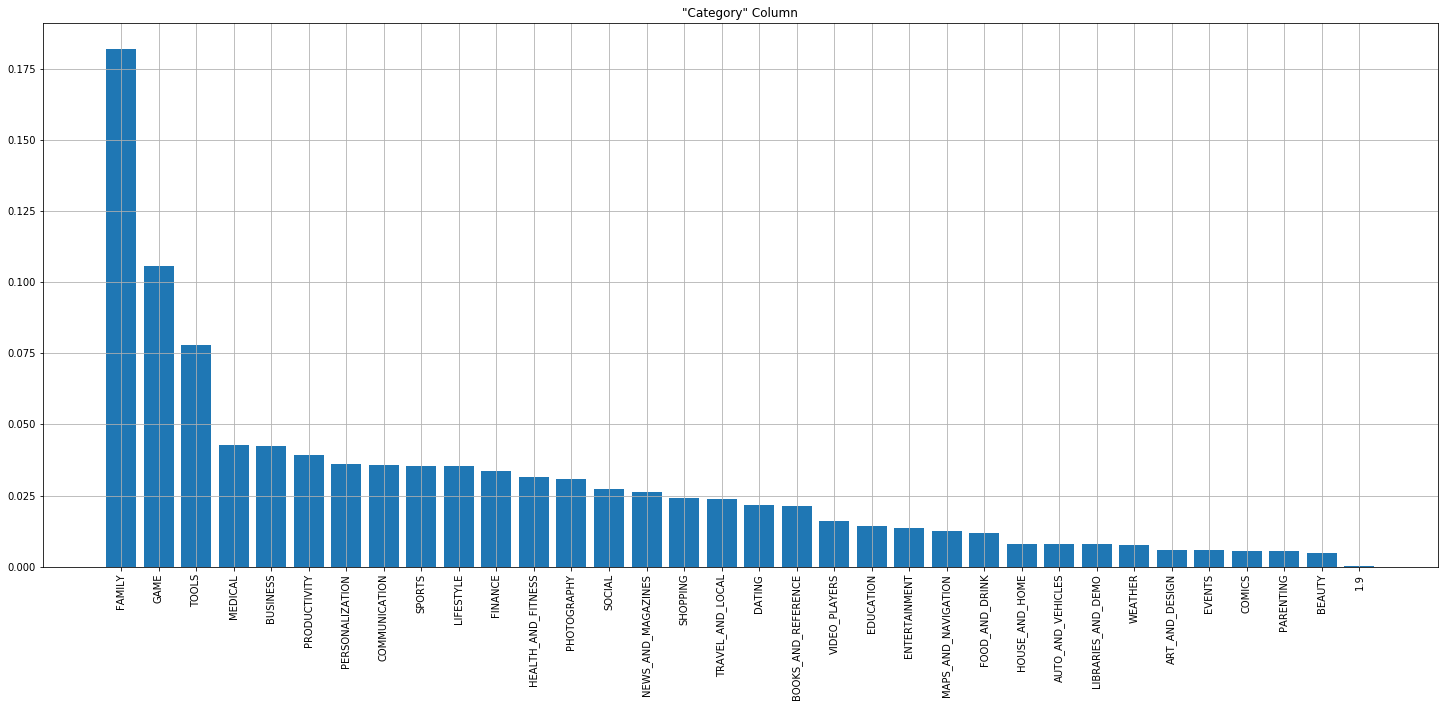

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


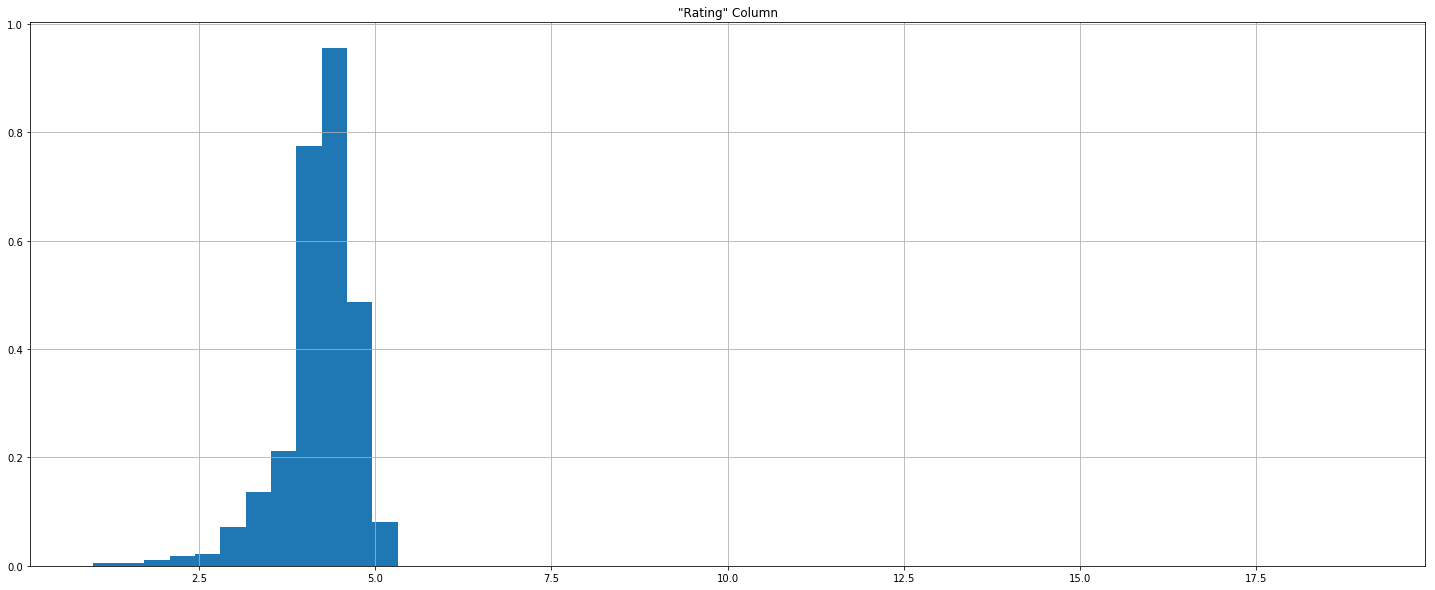

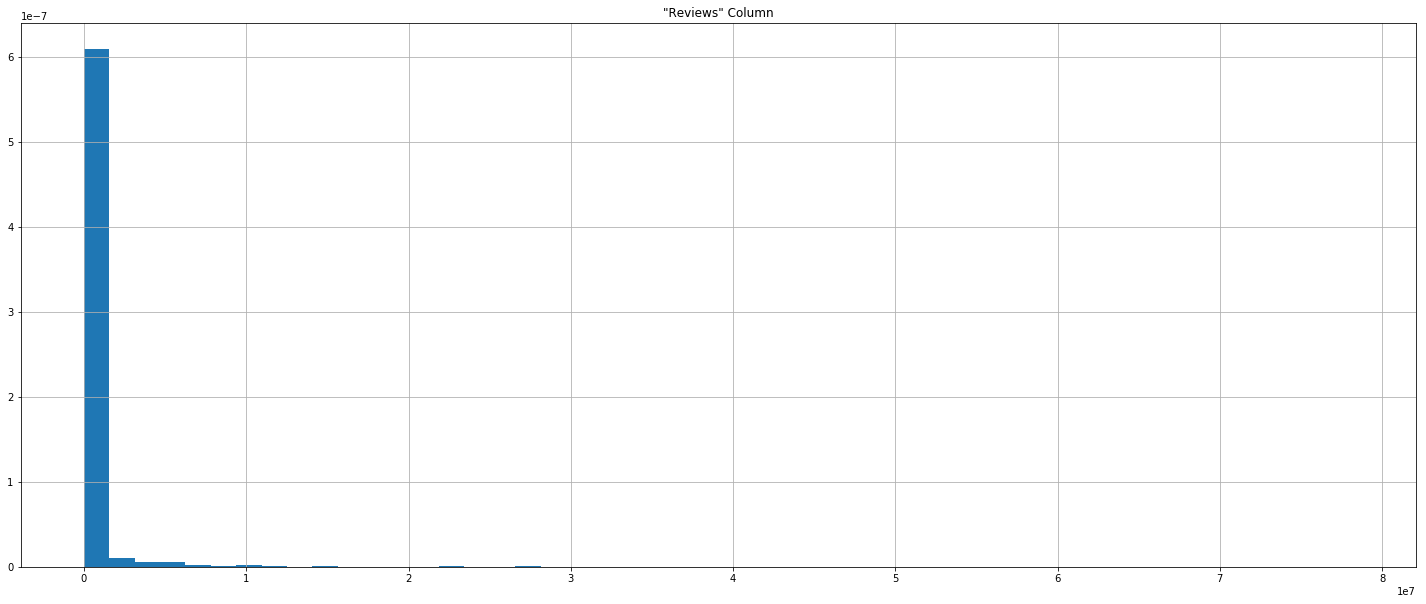

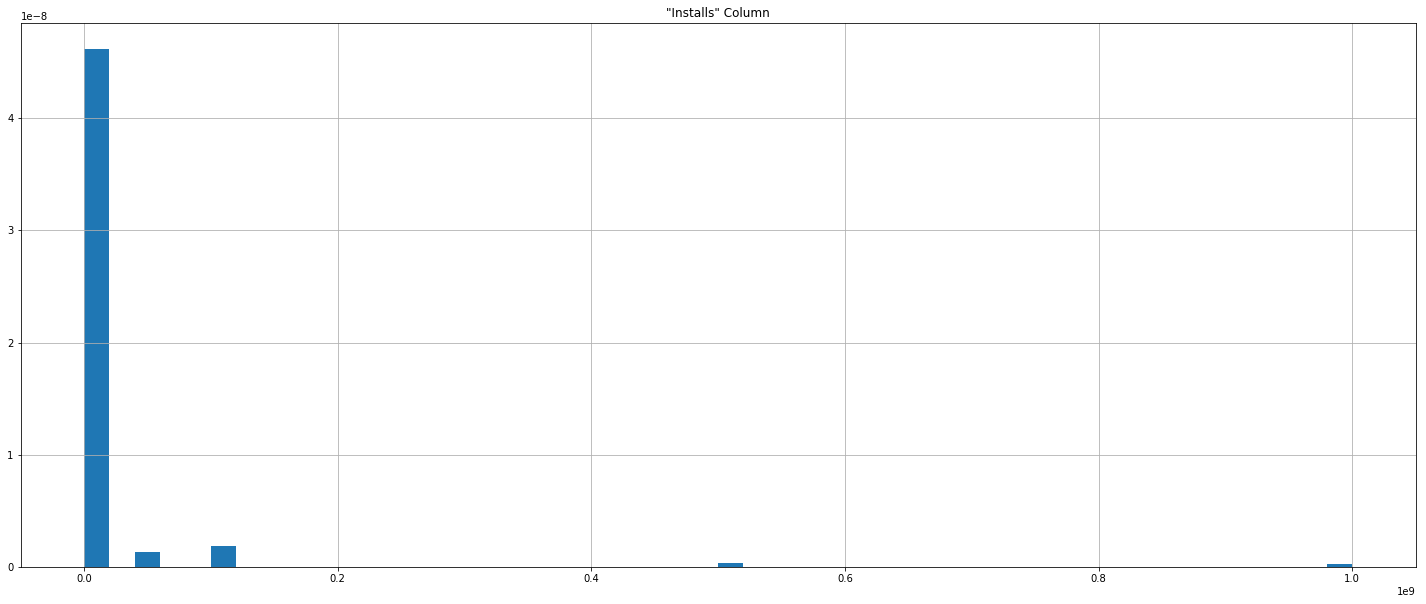

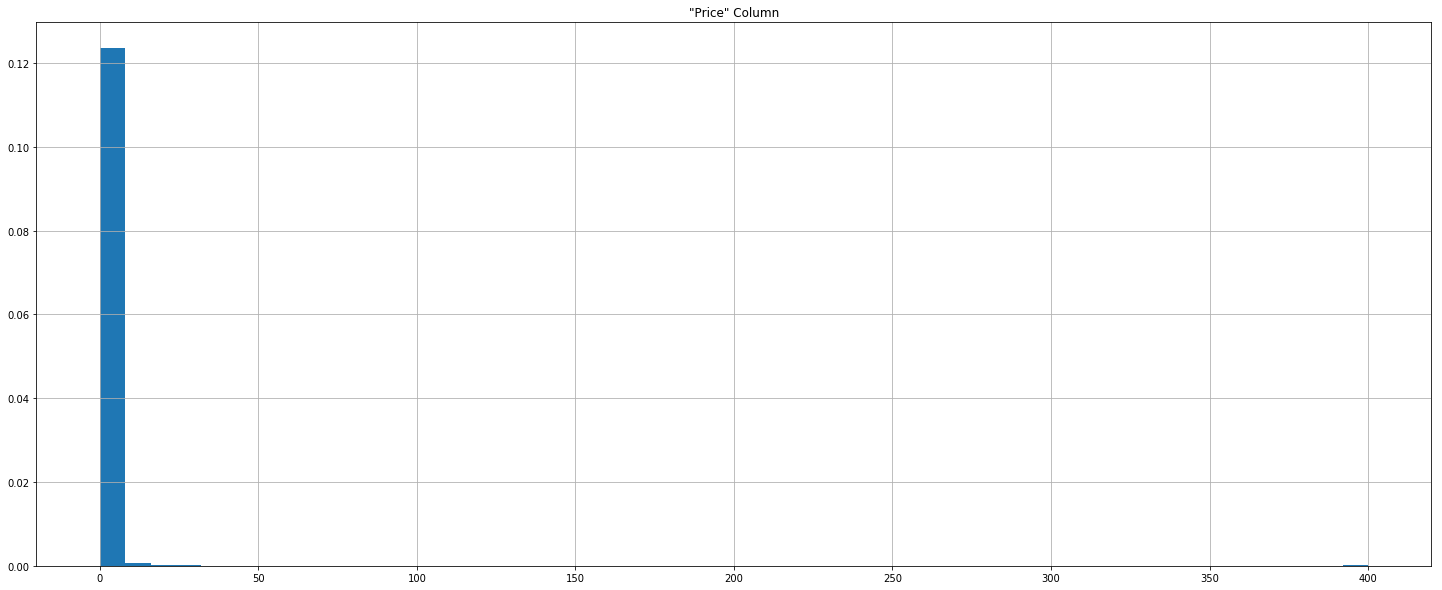

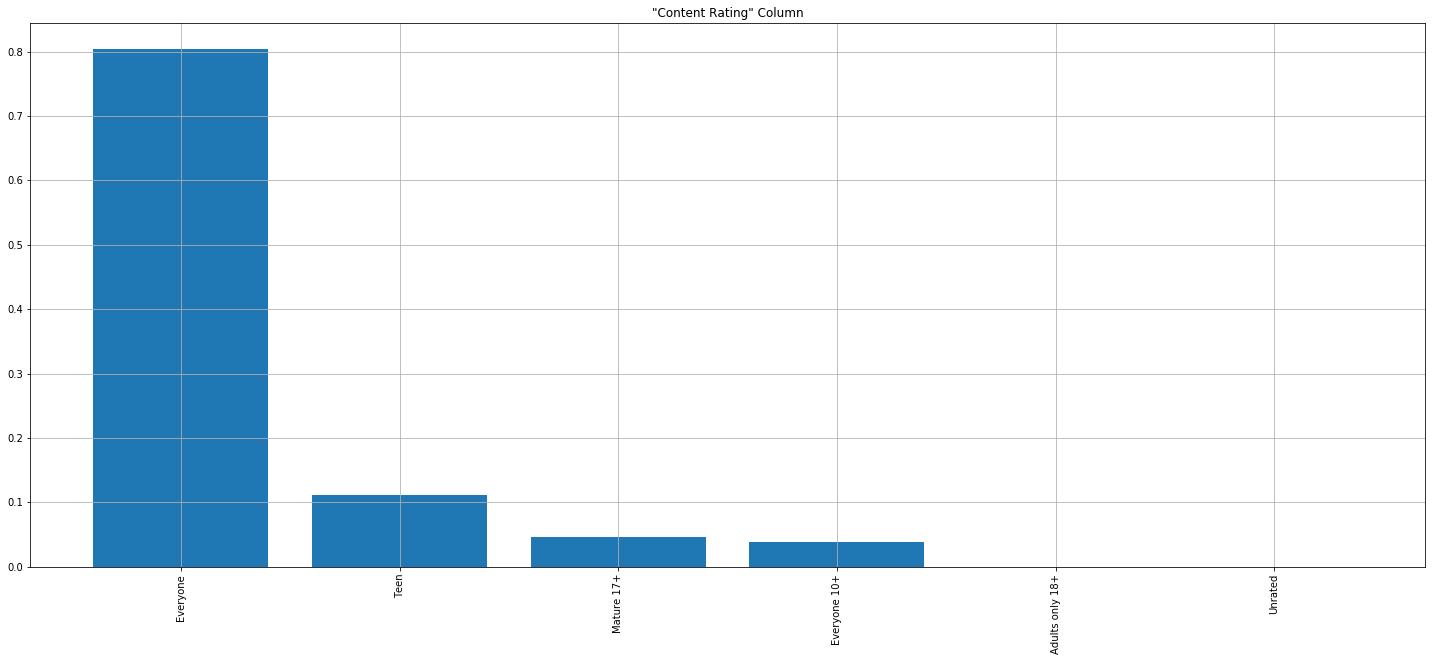

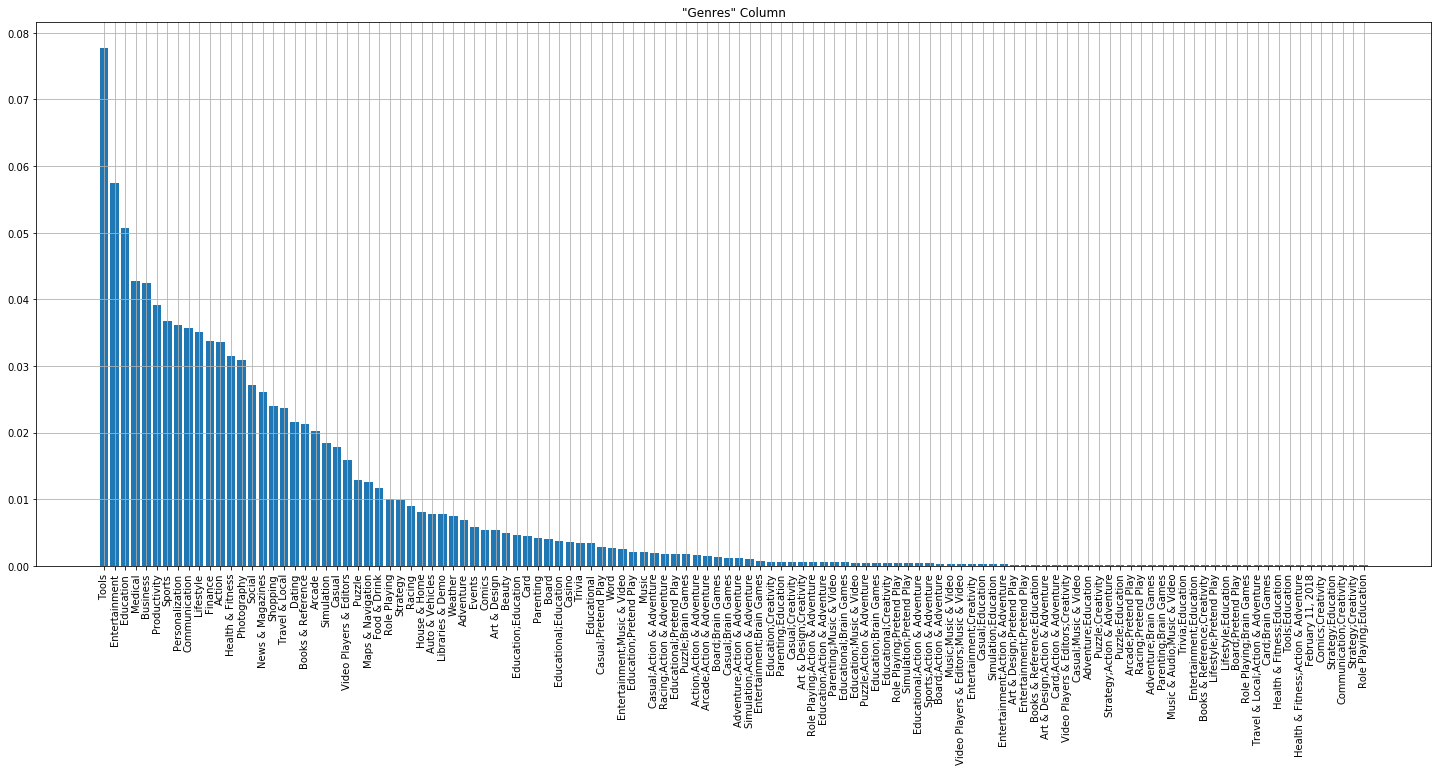

In [13]:
plt.figure(figsize=(25,10))
plt.bar(Google_data['Category'].value_counts(normalize=True).keys(), Google_data['Category'].value_counts(normalize=True).values)
plt.xticks(rotation='vertical')
plt.title('"Category" Column')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.hist(Google_data['Rating'], bins=50, density='normed')
plt.title('"Rating" Column')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.hist(Google_data['Reviews'], bins=50, density='normed')
plt.title('"Reviews" Column')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.hist(Google_data['Installs'], bins=50, density='normed')
plt.title('"Installs" Column')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.hist(Google_data['Price'], bins=50, density='normed')
plt.title('"Price" Column')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.bar(Google_data['Content Rating'].value_counts(normalize=True).keys(), Google_data['Content Rating'].value_counts(normalize=True).values)
plt.xticks(rotation='vertical')
plt.title('"Content Rating" Column')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.bar(Google_data['Genres'].value_counts(normalize=True).keys(), Google_data['Genres'].value_counts(normalize=True).values)
plt.xticks(rotation='vertical')
plt.title('"Genres" Column')
plt.grid()
plt.show()

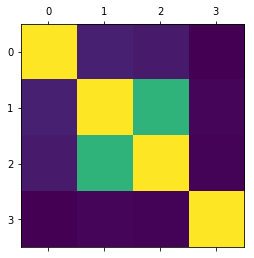

In [10]:
plt.matshow(Google_data.corr())
plt.show()

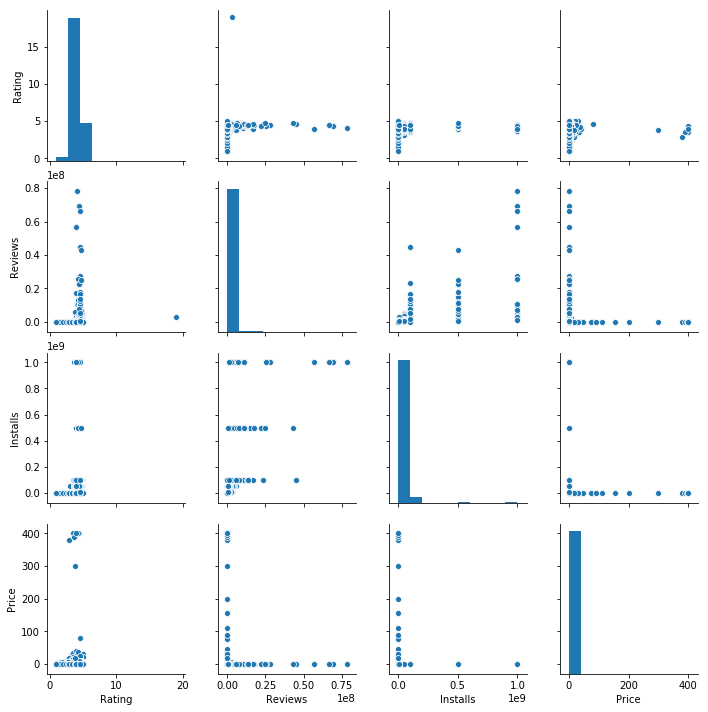

In [20]:
plot = sns.pairplot(Google_data)

___
## C. MODELOS DE PREDIÇÃO

Para utilizar os diferentes modelos de predição, primeiro é necessário separar o *database* em base de testes e base de treinamento.

A base de treinamento será 70% do *database* e a base de testes os 30% restantes (aproximadamente).

In [11]:
def dummify(data, column_name):
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [13]:
Google_data = dummify(Google_data, "Category")
Google_data = dummify(Google_data, "Content Rating")
Google_data = dummify(Google_data, "Genres")

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [16]:
def mean_predict(training_dataframe, test_dataframe, column):
    for val in test_dataframe:
        mean = np.mean(training_dataframe[column])
    return mean

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [ ]:
Google_data.dtypes

In [24]:
PlayStore_X = list(Google_data.columns)
Google_data = Google_data.dropna()
PlayStore_X.remove("App")
PlayStore_X.remove("Rating")
PlayStore_Y = 'Rating'

Google_data_X = Google_data[PlayStore_X]
Google_data_Y = Google_data[PlayStore_Y]

X_train, X_test, y_train, y_test = train_test_split(Google_data_X,Google_data_Y,test_size=.3,random_state=0)

knn_model = KNeighborsRegressor(11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print(mean_squared_error(y_test,y_pred))

ValueError: could not convert string to float: 'EVENTS'

In [21]:
help(KNeighborsClassifier.fit)

Help on function fit in module sklearn.neighbors.base:

fit(self, X, y)
    Fit the model using X as training data and y as target values
    
    Parameters
    ----------
    X : {array-like, sparse matrix, BallTree, KDTree}
        Training data. If array or matrix, shape [n_samples, n_features],
        or [n_samples, n_samples] if metric='precomputed'.
    
    y : {array-like, sparse matrix}
        Target values of shape = [n_samples] or [n_samples, n_outputs]



In [24]:
treinamento

,App,Rating,Reviews,Installs,Price,Category_1.9,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
3419,LINE Launcher,4.4,733838.0,1.000000e+07,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6539,BN Pro Arial Legacy Text,3.7,83.0,1.000000e+04,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,Free VIN Report for Used Cars,4.6,2431.0,1.000000e+05,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9964,SpeedApp EV,NaN,0.0,5.000000e+00,0.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9521,Mahila Vashikaran(Ek rat me)-Hindi,NaN,0.0,1.000000e+03,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2288,Whist - Tinnitus Relief,4.1,12.0,1.000000e+03,1.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2308,Teladoc Member,4.0,2094.0,5.000000e+05,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,Uber Driver,4.4,1254730.0,1.000000e+07,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4552,R-net for Android,3.3,48.0,5.000000e+03,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9142,Need for Speed™ No Limits,4.4,3344300.0,5.000000e+07,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
teste, treinamento = database_separator(Google_dat
PlayStore_X = list(Google_data.columns)
Google_data = Google_data.dropna()
PlayStore_X.remove("App")
PlayStore_X.remove("Rating")
PlayStore_Y = 'Rating'

resultsGoogle = variablesLessAlpha(Google_data, PlayStore_X, PlayStore_Y)
resultsGoogle.summary()


knn_predict(treinamento, PlayStore_X, PlayStore_Y, n=10)

Training Size: 7588 (69.994 %)
Test Size: 3253 (30.006 %)
Total Size: 10841 (100 %)



KeyError: "['Category' 'Size' 'Type' 'Content Rating' 'Genres'] not in index"

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [ ]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

def variablesLessAlpha(df, listX, y, alpha=0.05):
    '''
    Exclui todas as variaveis em que o P>|t| for maior que o alpha e retorna uma regressão linear
    
    df --> DataFrame
    listX --> Lista de variaveis independentes
    y --> Variavel dependente/a ser analizada 
    alpha --> nivel de significancia, 5% como padrão'''
    
    y = df[[y]]
    xs = df[listX]
    results = regress(xs, y)

    while actual_max > alpha:
        actual_max = max(results.pvalues)
        j = 0
        if actual_max > alpha:
            for e in list(results.pvalues):
                j += 1
                if e == actual_max:
                    break
            listX.remove(listX[j-2])
            xs = df[listX]
            results = regress(xs, y)
            
    return results

In [ ]:
Google_data.head()

In [ ]:
PlayStore_X = list(Google_data.columns)
Google_data = Google_data.dropna()
PlayStore_X.remove("App")
PlayStore_X.remove("Rating")
PlayStore_Y = 'Rating'

resultsGoogle = variablesLessAlpha(Google_data, PlayStore_X, PlayStore_Y)
resultsGoogle.summary()

In [ ]:
AppStore_x
AppStore_Y

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS